# Abalone Case Study

# Problem Statement:

* The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

* Attribute Information

* Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

* You have to predict the rings of each abalone which will lead us to the age of that abalone. 

# Importing necessary libraries

In [174]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score,plot_roc_curve,classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Step-1

* Loading the data
* Taken the samples of data head values
* Checked the data shape
* After data loading.then data describe done to know the features and labels for further analysis
* Checked the NaN values nothing found Nan values
* Label done usning LabelEncoder converted string to int

In [175]:
data=pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [176]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [177]:
data.shape

(4177, 9)

In [178]:
data.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [179]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])


In [180]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Adding age column in the dataframe for classification. Age is classified based on the number of rings.
* Rings 1-8 -->Age 1, denoting young
* Rings 9-10 -->Age 2, denoting middle
* Rings 11-29 -->Age 3, denoting old

In [181]:
def label_race (row):
    if row['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings'] >=9 and row['Rings']<=10:
        return 2
    elif row['Rings']>=11 and row['Rings']<=29:
        return 3
    return 0

In [182]:
data['Age'] = data.apply(lambda _: '', axis=1)

In [183]:
data['Age']=data.apply (lambda row: label_race (row),axis=1)

In [184]:
data.Sex = data.Sex.astype(float)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


# observations:-
* Here the the data describe done shows 8 features each have 4177 data and 1 label or target is predicted Rings

In [185]:
data[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,1.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,1.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


# Step-2
* plot the countplot due to observation of data
* plot the box plot and plot pair plot and FacetGrid for analysis of multicolinear features

<AxesSubplot:>

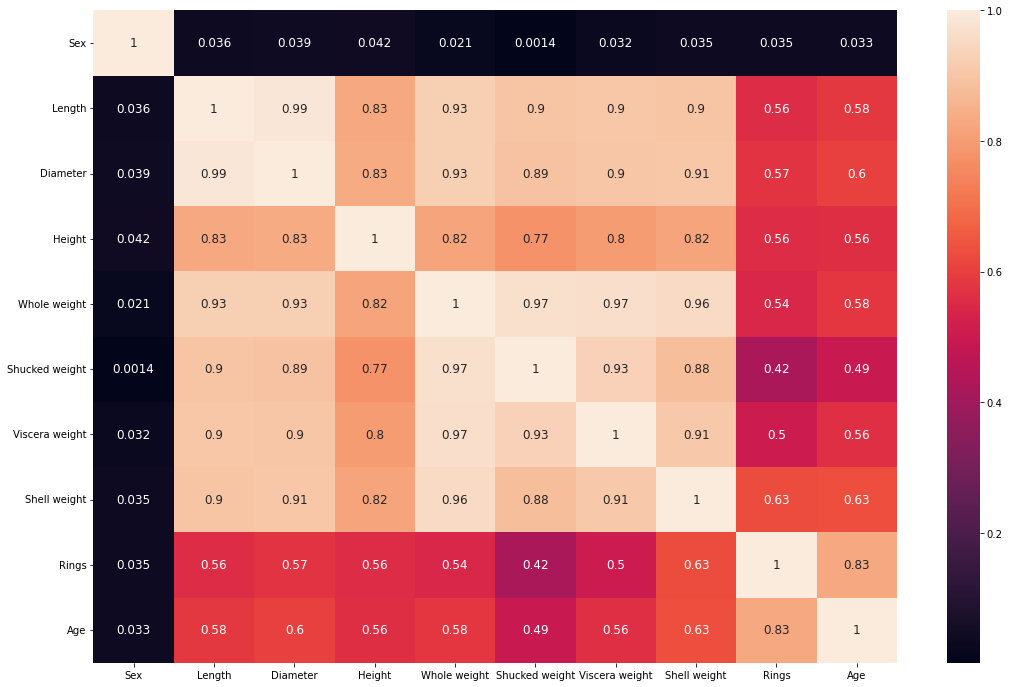

In [186]:
data_corr = data.corr().abs() # this code will get the coefficient of one variable vs all other variable (Relationship)

plt.figure (figsize=(18,12))
sns.heatmap(data_corr,annot=True, annot_kws={'size':12})

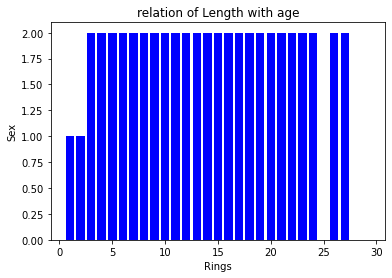

In [187]:
plt.bar(data['Rings'], data['Sex'], color = 'blue')
plt.title('relation of Length with age')
plt.xlabel('Rings')
plt.ylabel('Sex')
plt.show()


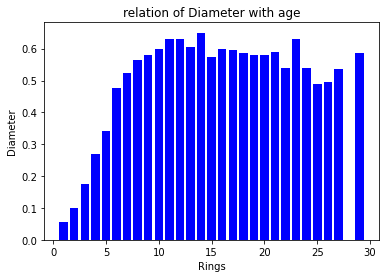

In [188]:
plt.bar(data['Rings'], data['Diameter'], color = 'blue')
plt.title('relation of Diameter with age')
plt.xlabel('Rings')
plt.ylabel('Diameter')
plt.show()

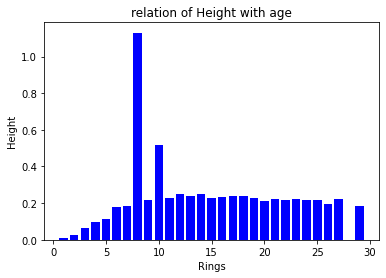

In [189]:
plt.bar(data['Rings'], data['Height'], color = 'blue')
plt.title('relation of Height with age')
plt.xlabel('Rings')
plt.ylabel('Height')
plt.show()

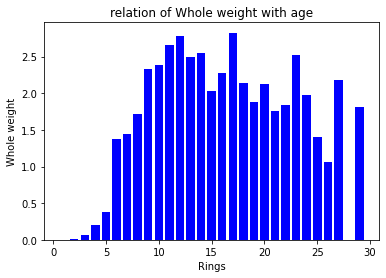

In [190]:
plt.bar(data['Rings'], data['Whole weight'], color = 'blue')
plt.title('relation of Whole weight with age')
plt.xlabel('Rings')
plt.ylabel('Whole weight')
plt.show()

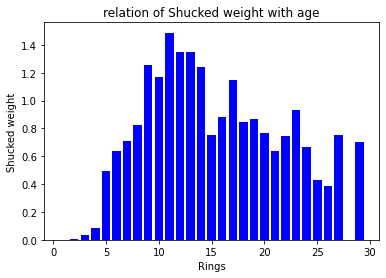

In [191]:
plt.bar(data['Rings'], data['Shucked weight'], color = 'blue')
plt.title('relation of Shucked weight with age')
plt.xlabel('Rings')
plt.ylabel('Shucked weight')
plt.show()

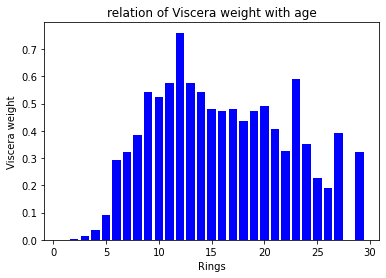

In [192]:
plt.bar(data['Rings'], data['Viscera weight'], color = 'blue')
plt.title('relation of Viscera weight with age')
plt.xlabel('Rings')
plt.ylabel('Viscera weight')
plt.show()

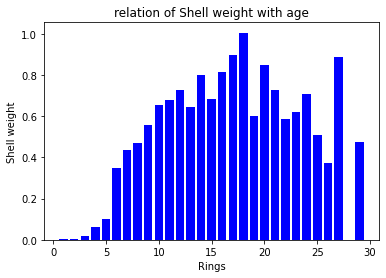

In [193]:
plt.bar(data['Rings'], data['Shell weight'], color = 'blue')
plt.title('relation of Shell weight with age')
plt.xlabel('Rings')
plt.ylabel('Shell weight')
plt.show()

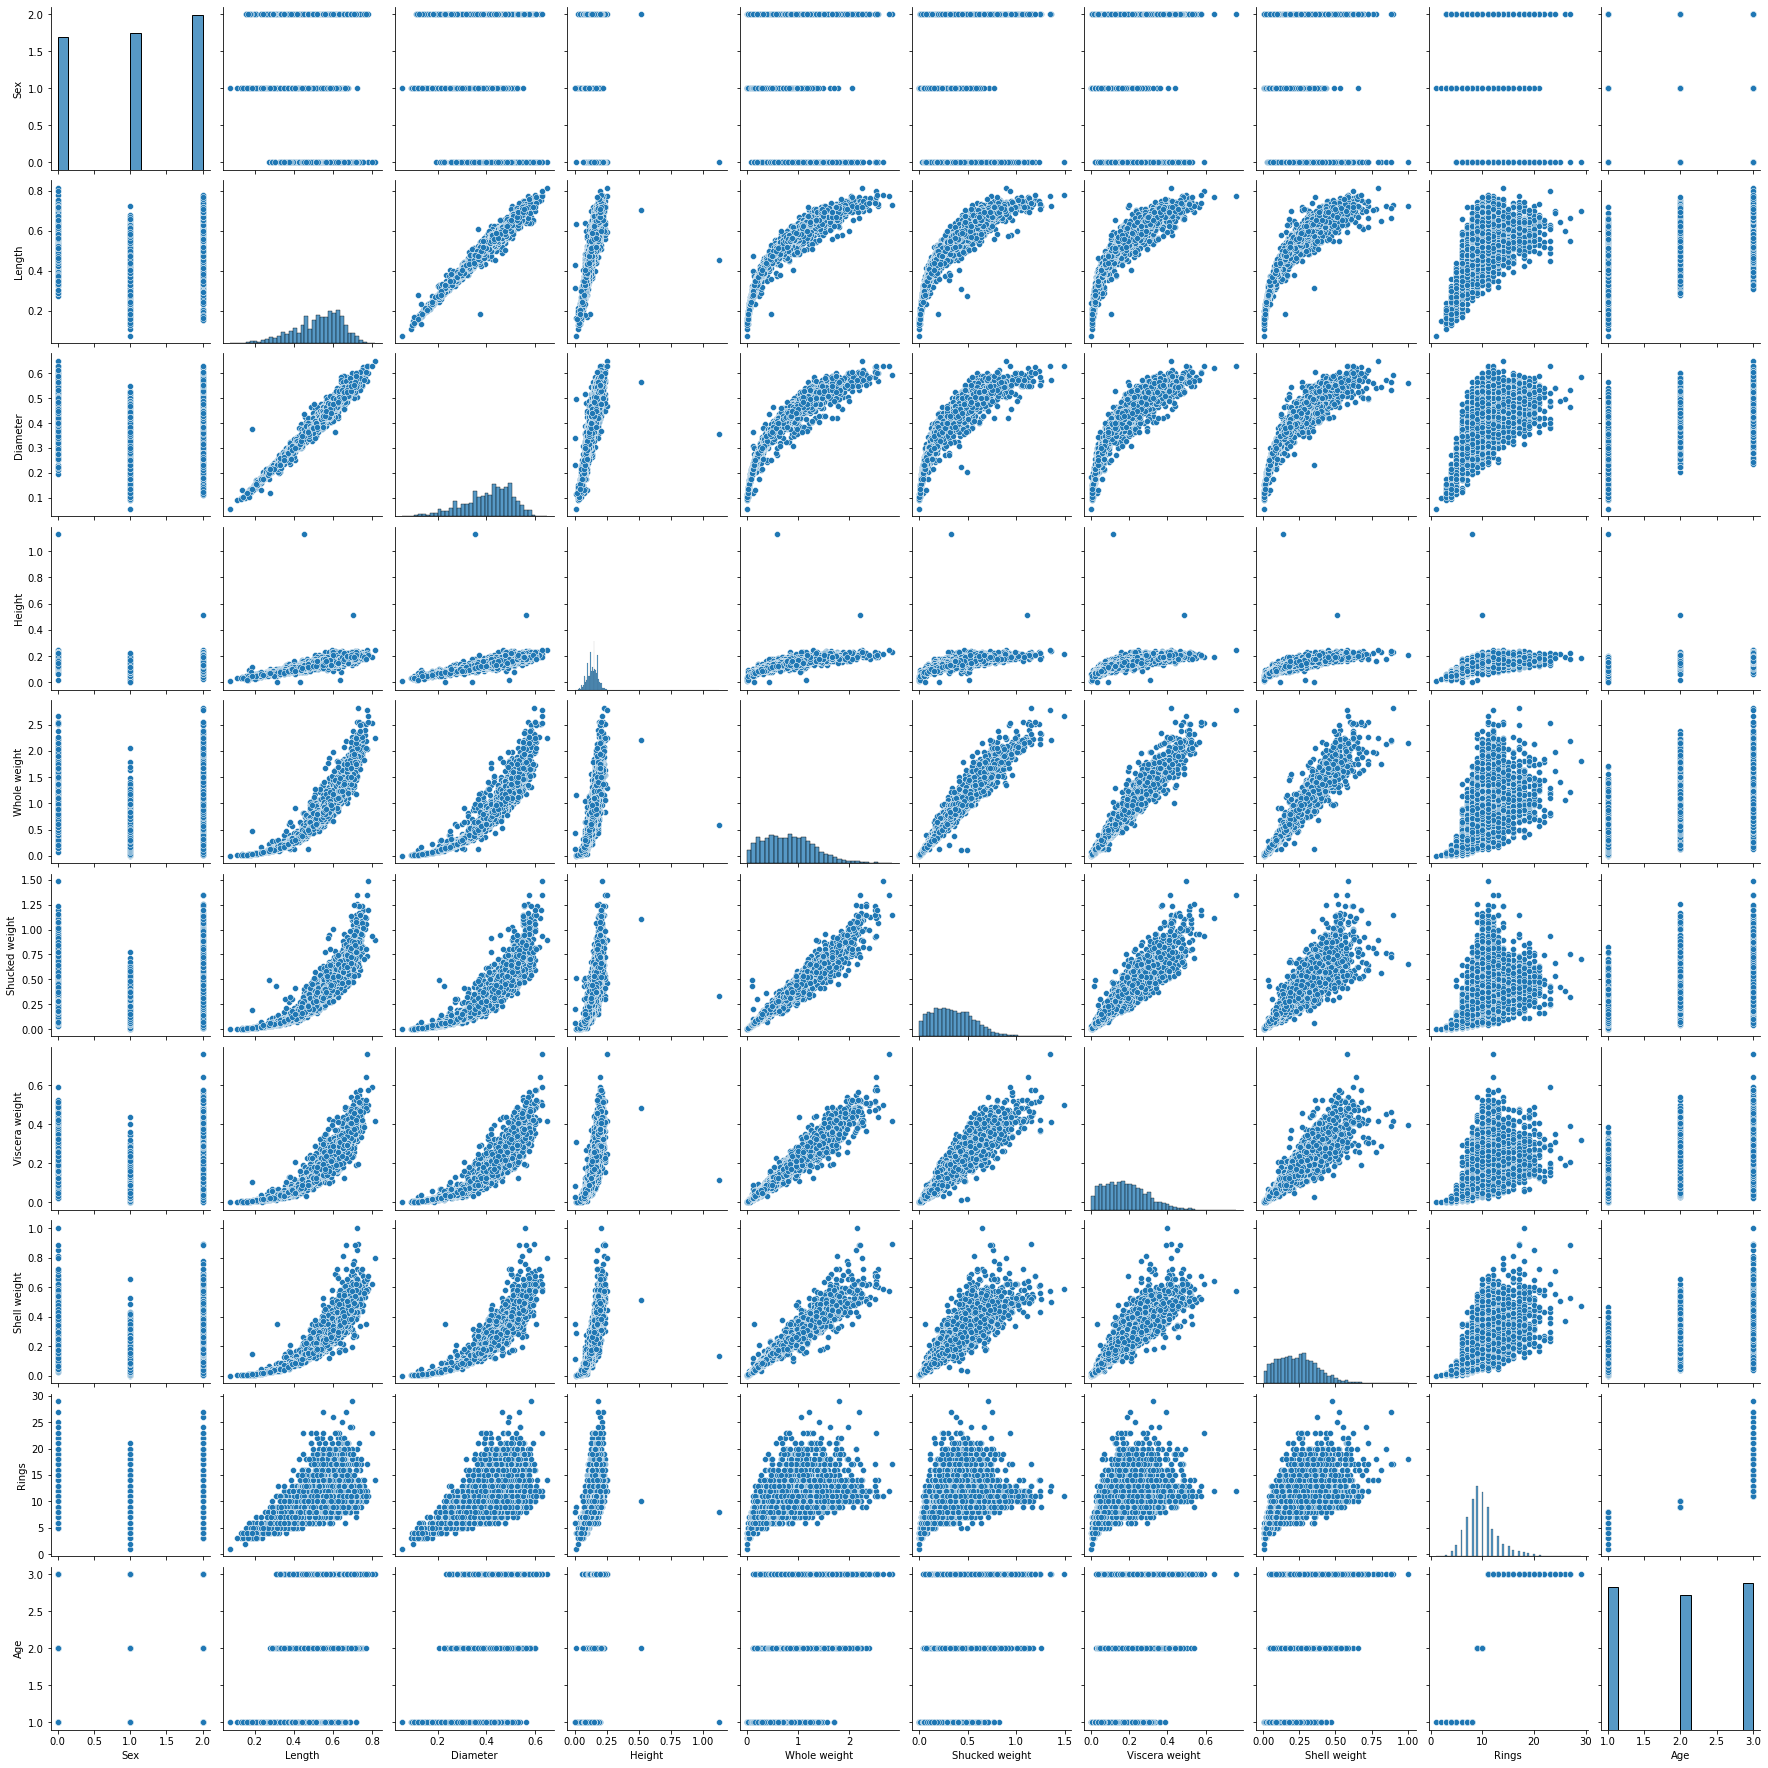

In [194]:
sns.pairplot(data)

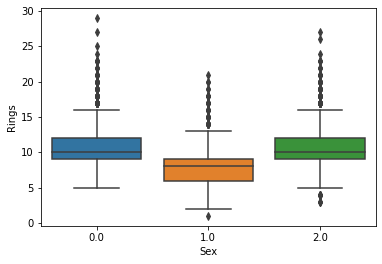

In [195]:
sns.boxplot(x="Sex", y="Rings", data=data)
plt.show()

# observations:-
* here we have lower number of rings as compared to males and females

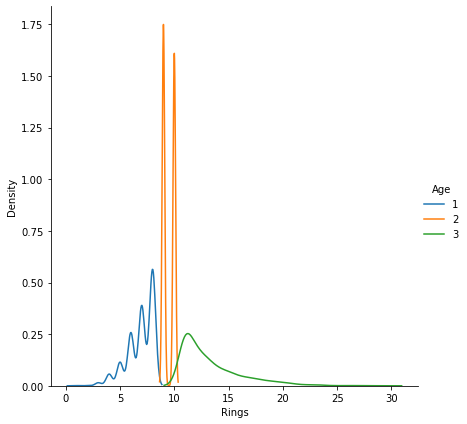

In [196]:
sns.FacetGrid(data, hue="Age", height=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()
plt.show()

# observations:-
* Here we Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings, Middle aged abalones have 9-11 rings and old abalones have more than 10 rings

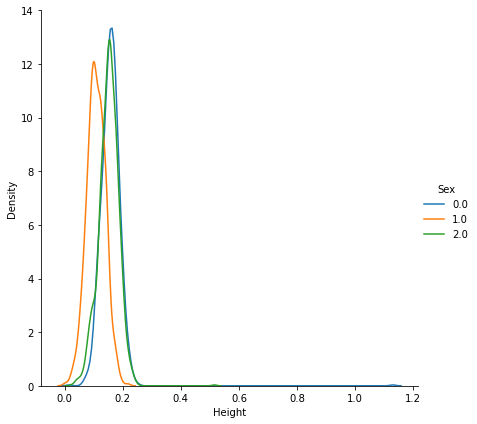

In [197]:
sns.FacetGrid(data, hue="Sex", height=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
plt.show()

# observations:-

* Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm
* Classification
* Response variable is age

In [198]:
Y = data[['Age']]
Y 

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


# Predictor variables obtained by dropping rings and age from the dataframe

In [199]:
X=data.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


<Figure size 432x288 with 0 Axes>

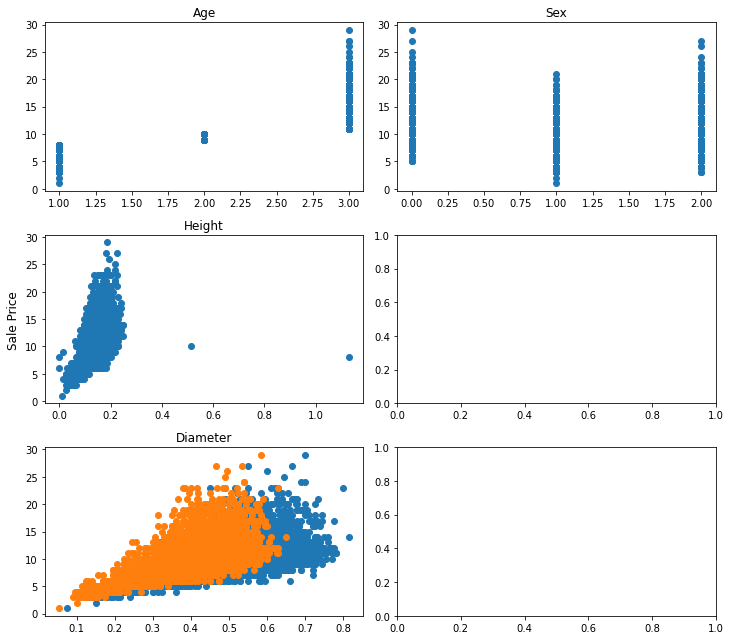

In [200]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = data.Rings.values
axarr[0, 0].scatter(data.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(data.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(data.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(data.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(data.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

# observations:-

* Height of abalones is in the range of 0 to 0.2mm, most abalones are old aged.

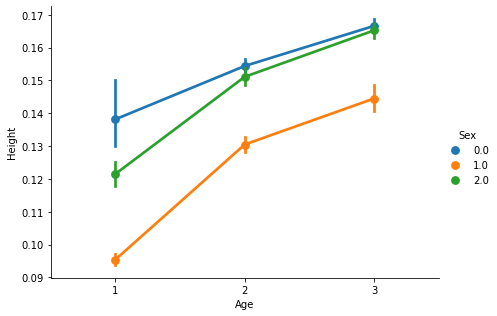

In [201]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = data, 
             height = 4.5, aspect = 1.4)
plt.show()

# observations:-
* Female abalones have largest height. Male abalones have height ranging from 0.12 to 0.15mm.
  Dividing the dataset into 75% training and 25% test data using train_test_split

# STEP-3
# Modeling Data

* here finding the best model

* Here find best random State for fitting to a model,fitting through a model of any choice in a loop of some value generated train test splitto find the best

* Using DecisionTreeClassifier to finding the best model

In [243]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y)

In [244]:
print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)

train_df_x:
(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


In [245]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [246]:
feature_name = list(X.columns)
class_name = list(Y_train)
feature_name

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [247]:
clf.score(X_train,Y_train) # this is traning score

1.0

In [248]:
y_pred = clf.predict(x_test)

In [249]:
accuracy_score(y_test,y_pred)# here find accuracy score 

0.5636363636363636

# STEP-4

* Here tuning the parameter by unsing some models
* models = LogisticRegression,KNN,DecisionTreeClassifier,RandomForestClassifier,neural_network MLPClassifier

In [250]:
grid_param= {
         'criterion': ['gini','entropy'],
         'max_depth': range(10,15),
         'min_samples_leaf': range(2,10),
         'min_samples_split':range(3,10),
         'max_leaf_nodes': range(2,4),
}

grid_search = GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)


In [251]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [252]:
best_parameters= grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [253]:
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print('\nconf_mat = >','\n', rf_conf_mat)

print('\nAccuracy rf Normal======>',accuracy_score(y_test,y_pred))


conf_mat = > 
 [[243  81  32]
 [ 75 128  89]
 [ 42 137 218]]

Accuracy rf Normal======> 0.5636363636363636


In [254]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.68      0.68      0.68       356
           2       0.37      0.44      0.40       292
           3       0.64      0.55      0.59       397

    accuracy                           0.56      1045
   macro avg       0.56      0.56      0.56      1045
weighted avg       0.58      0.56      0.57      1045



In [255]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()
mlp=MLPClassifier()

In [256]:
#training with all classifiers
rf.fit(X_train,Y_train)
lr.fit(X_train,Y_train)
kn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
mlp.fit(X_train,Y_train)
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

print ("All models are trained")


All models are trained


In [257]:
# All models score captured
# LogisticRegression
print('\nAccuracy LogisticRegression ======>',lr.score(x_test,y_test )*100)


Accuracy LogisticRegression ======> 62.87081339712919


In [258]:
# KNeighborsClassifier
print('\nAccuracy KNeighborsClassifier ======>',kn.score(x_test,y_test)*100)


Accuracy KNeighborsClassifier ======> 61.33971291866028


In [259]:
#DecisionTreeClassifier
print('\nAccuracy DecisionTreeClassifier ======>',dt.score(x_test,y_test)*100)


Accuracy DecisionTreeClassifier ======> 57.99043062200957


In [260]:
# RandomForestClassifier
rf.score(x_test,y_test)
print('\nAccuracy RandomForestClassifier ======>',rf.score(x_test,y_test)*100)


Accuracy RandomForestClassifier ======> 62.87081339712919


In [261]:
# neural_network  MLPClassifier
mlp.score(x_test,y_test)# here tuning parameter done found highest response 
print('\nAccuracy MLPClassifier ======>',mlp.score(x_test,y_test)*100)


Accuracy MLPClassifier ======> 65.16746411483254


# Models
1.Logistic Regression Accuracy :62.87081339712919

2.Random Forest Accuracy : 62.87081339712919

3.KNN Classifier Accuracy :61.33971291866028

4.DecisionTreeClassifier Accuracy :61.33971291866028

5.MLPClassifier: 65.16746411483254



# Conclusion:-

* here i chooseneural_network  MLPClassifier tuning parameter due to got best out put accuracy
